# 决策树算法

## 决策树的构造

### 优缺点
> 优点：>计算复杂度不高，输出结果易于理解，对中间值的缺失不敏感，可以处理不相关特征数据。
> 缺点：>可能会产生过渡匹配问题
> 适用数据类型：>数值型和标称型

创建分支的伪代码函数createBranch()如下所示：<br/>
监测数据集中的每个子项是否属于同一分类：<br/>
&nbsp;&nbsp;If so return 类标签<br/>
&nbsp;&nbsp;&nbsp;&nbsp;Else<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;寻找划分数据集的最好特征<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;划分数据集<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;创建分支节点<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;for 每个划分的子集<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;调用函数createBranch并增加返回结果到分支节点中<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;return 分支节点<br/>


## 信息增益

>在划分数据集之前之后信息发生的变化成为信息增益，知道如何计算信息增益，就可以计算每个特征值划分数据集获得的信息增益，获得信息增益最高的特征就是最好的选择。


>集合信息的度量方式称为香农熵或者简称为熵，这个名字来源于信息论之父劳德.香农

>信息增益（Information gain）和熵（entropy），这些概念自诞生那天起，就令人费解。克劳德.香农写完信息论后，约翰.冯.诺依曼建议使用“熵”这个术语。

>熵定义为信息的期望值，在明晰这个概念之前，我们必须知道信息的定义。如果待分类的事务可能划分在多个分类之中，则符号Xi的信息定义为：
l(xi)=-㏒₂P(xi)其中P(Xi)是选择该分类的概率。

>为了计算熵，需要计算所有类别所有可能值包含的信息期望值，通过下面的公式得到：
H=-∑[i=1,n]P(xi)log₂P(xi)



In [4]:
from math import log
#计算信息-熵；可以按照获取最大信息增益的方法划分数据集
def calcShannoEnt(dataSet):
    numEntries=len(dataSet)
    labelCounts={}
    for featVec in dataSet:
        currentLabel=featVec[-1]     #取最后一列作为数组的分类标签
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel] +=1
    shannonEnt=0.0
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntries   #求某一项的分类（P(X)）
        shannonEnt-=prob*log(prob,2)              #求熵∑[i=1,n]P(xi)log₂P(xi)
    return shannonEnt


#创建测试数据集
def createDataSet():
    dataSet=[
        [1,1,'yes'],
        [1,1,'yes'],
        [1,0,'no'],
        [0,1,'no'],
        [0,1,'no'],
    ]
    labels=['no surfacing','flippers']
    return dataSet,labels


testdata,testlabels=createDataSet()
testdata
calcShannoEnt(testdata)

0.9709505944546686

## 划分数据集
> 熵是度量数据集的无序程度的。

In [5]:
#按照给定特征划分数据集
#输入参数：待划分的数据集、划分数据集的特征、需要返回的特征的值
def splitDataSet(dataSet,axis,value):
    retDataSet=[]                           #创建新的list对象
    for featVec in dataSet:
        if featVec[axis] ==value:
            reducedFeatVec=featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

testdata,testlabels=createDataSet()
testdata
print(splitDataSet(testdata,0,1))
print(splitDataSet(testdata,0,0))

[[1, 'yes'], [1, 'yes'], [0, 'no']]
[[1, 'no'], [1, 'no']]


In [ ]:
#比较python 中append()和extend()方法的不同
a=[1,2,3]
b=[4,5,6]
a.append(b)
a.extend(b)

In [6]:
#选择最好的数据集划分方式
def chooseBestFeatureToSplit(dataSet):
    # print(dataSet[0])
    numFeatures=len(dataSet[0])-1
    baseEntropy =calcShannoEnt(dataSet)
    bestInfoGain =0.0;bestFeature=-1
    for i in range(numFeatures):
        featList=[example[i] for example in dataSet]
        #print(featList)
        uniqueVals=set(featList)
        #print(uniqueVals)
        newEntropy=0.0
        for value in uniqueVals:
            subDataSet=splitDataSet(dataSet,i,value)
            prob=len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannoEnt(subDataSet)
        #print('newEntropy:%s'%newEntropy)
        #print('i:%s'%i)
        infoGain = baseEntropy - newEntropy
        #print('infoGain:%s'%infoGain)        
        if(infoGain>bestInfoGain):
            bestInfoGain=infoGain
            bestFeature=i
    return bestFeature

testdata,testlabels=createDataSet()
chooseBestFeatureToSplit(testdata)


0

In [19]:
import operator

#分类名
def majorityCnt(classList):
    classCount={}
    for vote in classCount:
        if vote not in classCount.keys():
            classCount[vote]=0
        classCount[vote]+=1
    sortedClassCount=sorted(classCount.iteritems(),key=operator.iteritems(1),reversed=True)
    print("sortedClassCount:::::::::%s"%sortedClassCount)
    return sortedClassCount[0][0]

In [21]:
#创建树的函数代码
def createTree(dataSet,labels):
    classList=[example[-1] for example in dataSet]
    print('classList:%s'%classList)
    print('classList.count:%s'%classList.count(classList[0]))
    print('len(classList):%s'%len(classList))
    if classList.count(classList[0])==len(classList):
        return classList[0]
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    print(bestFeat)
    bestFeatLabel=labels[bestFeat]
    print(bestFeatLabel)
    myTree ={bestFeatLabel:{}}
    print(myTree)
    print(labels)
    del(labels[bestFeat])
    print(labels)
    featValues=[example[bestFeat] for example in dataSet]
    print(featValues)
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels=labels[:]
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),subLabels)
    return myTree

testdata,testlabels=createDataSet()
myTree=createTree(testdata,testlabels)

myTree

classList:['yes', 'yes', 'no', 'no', 'no']
classList.count:2
len(classList):5
0
no surfacing
{'no surfacing': {}}
['no surfacing', 'flippers']
['flippers']
[1, 1, 1, 0, 0]
classList:['no', 'no']
classList.count:2
len(classList):2
classList:['yes', 'yes', 'no']
classList.count:2
len(classList):3
0
flippers
{'flippers': {}}
['flippers']
[]
[1, 1, 0]
classList:['no']
classList.count:1
len(classList):1
classList:['yes', 'yes']
classList.count:2
len(classList):2


{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

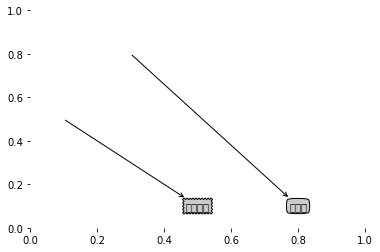

In [41]:
#-*- coding: utf-8 -*-
import matplotlib.pyplot as plt
decisionNode = dict(boxstyle='sawtooth', fc='0.8')
leafNode=dict(boxstyle='round4',fc='0.8')
arrow_args=dict(arrowstyle='<-')

def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords='axes fraction',xytext=centerPt,textcoords='axes fraction',va='center',ha='center',bbox=nodeType,arrowprops=arrow_args)

def createPlot():
    fig=plt.figure(1,facecolor='white')
    fig.clf()
    createPlot.ax1=plt.subplot(111,frameon=False)
    plotNode('决策节点',(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode('叶节点',(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()
createPlot()

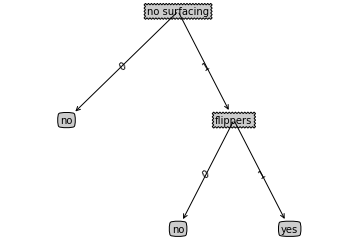

In [2]:
'''
Created on Oct 14, 2010

@author: Peter Harrington
'''
import matplotlib.pyplot as plt

decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )
    
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = myTree.keys()[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

#def createPlot():
#    fig = plt.figure(1, facecolor='white')
#    fig.clf()
#    createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
#    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
#    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
#    plt.show()

def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

thisTree=retrieveTree(0)
createPlot(thisTree)